<a href="https://colab.research.google.com/github/TejaswiGithu/Stock-Price--fb_prohet_AIRO/blob/main/Stock_Price_fb_prohet_AIRO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [3]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import math
import pandas_datareader as web
from prophet.plot import plot_plotly,plot_components_plotly
from prophet import Prophet

In [6]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [8]:
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override()

# download dataframe using pandas_datareader
stock_data = pdr.get_data_yahoo("ARLO", start="2019-12-17", end='2022-08-31')

[*********************100%***********************]  1 of 1 completed


In [4]:
# stock_data = pd.read_csv('/content/drive/MyDrive/stock prices/FIGS.csv',parse_dates=True,index_col='Date')

In [19]:
stock_data=stock_data.reset_index()

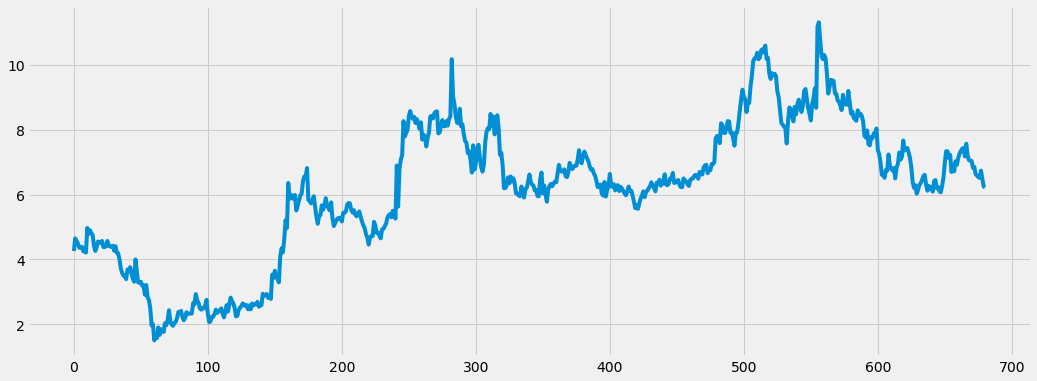

In [20]:
# Plotting the time series.
# plt.figure(figsize=(16,6))
# plt.plot(stock_data['Close'])
# plt.show()

In [21]:
df=stock_data[['Date','Close']]

In [22]:
df

,Date,Close
0,2019-12-17,4.26
1,2019-12-18,4.65
2,2019-12-19,4.57
3,2019-12-20,4.49
4,2019-12-23,4.36
...,...,...
676,2022-08-24,6.52
677,2022-08-25,6.74
678,2022-08-26,6.50
679,2022-08-29,6.25


In [23]:
df.columns=['ds','y']

In [24]:
df['ds']=pd.to_datetime(df['ds'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
df

,ds,y
0,2019-12-17,4.26
1,2019-12-18,4.65
2,2019-12-19,4.57
3,2019-12-20,4.49
4,2019-12-23,4.36
...,...,...
676,2022-08-24,6.52
677,2022-08-25,6.74
678,2022-08-26,6.50
679,2022-08-29,6.25


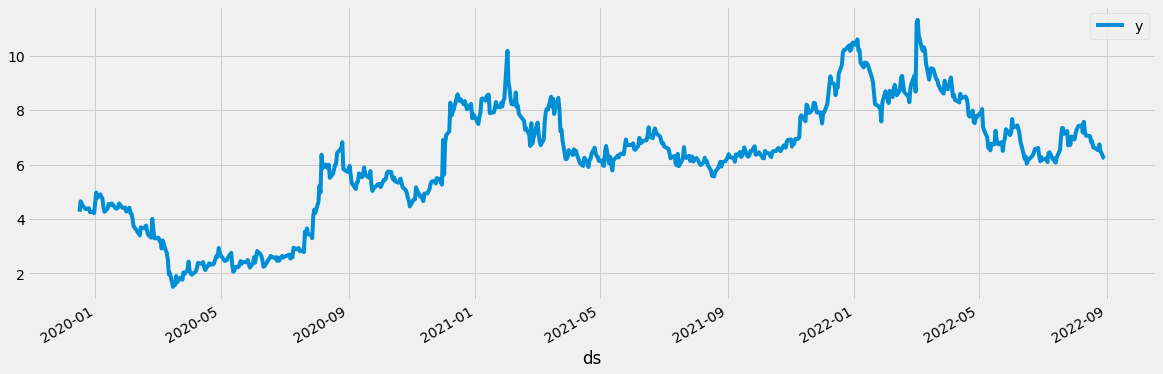

In [26]:
df.plot(x='ds',y='y',figsize=(18,6))

In [27]:
train=df.iloc[:len(df)-60]
test=df.iloc[len(df)-60:]

In [28]:
train

,ds,y
0,2019-12-17,4.26
1,2019-12-18,4.65
2,2019-12-19,4.57
3,2019-12-20,4.49
4,2019-12-23,4.36
...,...,...
616,2022-05-27,7.30
617,2022-05-31,7.08
618,2022-06-01,7.17
619,2022-06-02,7.67


In [29]:
test

,ds,y
621,2022-06-06,7.41
622,2022-06-07,7.44
623,2022-06-08,7.31
624,2022-06-09,7.13
625,2022-06-10,6.84
626,2022-06-13,6.39
627,2022-06-14,6.21
628,2022-06-15,6.29
629,2022-06-16,6.03
630,2022-06-17,6.14


In [30]:
m=Prophet()
m.fit(train)
future=m.make_future_dataframe(periods=30)
forecast=m.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp339ffchn/lgaj2g1s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp339ffchn/x467gb20.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67281', 'data', 'file=/tmp/tmp339ffchn/lgaj2g1s.json', 'init=/tmp/tmp339ffchn/x467gb20.json', 'output', 'file=/tmp/tmp1kyw1n2j/prophet_model-20220901192549.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:25:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:25:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [32]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
646,2022-06-29,9.018113,7.012737,8.533684,8.998219,9.041521,-1.256913,-1.256913,-1.256913,-0.335219,-0.335219,-0.335219,-0.921694,-0.921694,-0.921694,0.0,0.0,0.0,7.761200
647,2022-06-30,9.023202,6.939137,8.489978,9.001786,9.048823,-1.298806,-1.298806,-1.298806,-0.340683,-0.340683,-0.340683,-0.958123,-0.958123,-0.958123,0.0,0.0,0.0,7.724396
648,2022-07-01,9.028290,6.884613,8.432940,9.004825,9.055742,-1.360413,-1.360413,-1.360413,-0.364726,-0.364726,-0.364726,-0.995687,-0.995687,-0.995687,0.0,0.0,0.0,7.667878
649,2022-07-02,9.033379,8.071438,9.663202,9.008322,9.063394,-0.154190,-0.154190,-0.154190,0.879687,0.879687,0.879687,-1.033877,-1.033877,-1.033877,0.0,0.0,0.0,8.879189
650,2022-07-03,9.038468,8.135469,9.641706,9.010830,9.070182,-0.192466,-0.192466,-0.192466,0.879686,0.879686,0.879686,-1.072153,-1.072153,-1.072153,0.0,0.0,0.0,8.846002


In [33]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
646,2022-06-29,7.761200,7.012737,8.533684
647,2022-06-30,7.724396,6.939137,8.489978
648,2022-07-01,7.667878,6.884613,8.432940
649,2022-07-02,8.879189,8.071438,9.663202
650,2022-07-03,8.846002,8.135469,9.641706


In [34]:
test.tail()

,ds,y
676,2022-08-24,6.52
677,2022-08-25,6.74
678,2022-08-26,6.50
679,2022-08-29,6.25
680,2022-08-30,6.22


In [35]:
plot_plotly(m,forecast)

In [38]:
from statsmodels.tools.eval_measures import rmse

In [39]:
predictions=forecast.iloc[-60:]['yhat']

In [41]:
rmse(predictions,test['y'])

1.2679110079588518

In [42]:
test['y'].mean()

6.710833342870076